# Analisis y curacion de datos - Datos faltantes y ruidosos

## Datos Ruidosos

Casi todos los conjuntos de datos contienen algo de ruido, y cuanto menos ruido haya, mejor ("más limpio") será el conjunto de datos. Algunos tipos de ruido son más fáciles de corregir que otros. A veces, eliminar el ruido por completo es simplemente imposible y todo lo que puede hacer es volver a muestrear o esperar lo mejor, teniendo en cuenta que en procesamiento de datos, <span style="color:FireBrick">**cuando entra basura, sale basura.**</span>

### Tipos de datos ruidosos

* El <span style="color:FireBrick">**dato erróneo**</span>  es un dato recolectado con algun error, que lo separa de la generalidad. Debe ser inspeccionado y tratado especialmente para determinar si es un <span style="color:FireBrick">**ruido**</span> o un dato importante con baja probabilidad de ocurrir, es decir un  <span style="color:FireBrick">**dato atípico**</span> o <span style="color:FireBrick">**outlier**</span>.

* El <span style="color:FireBrick">**dato faltante**</span> es el un dato que no esta registrado en la database. Dependiendo como se hayan recolectado los datos y escrito el archivo de datos, pueden estar marcados con un <span style="color:FireBrick">**NaN**</span>, o con un número fuera de rango, como <span style="color:FireBrick">**0**</span> o <span style="color:FireBrick">**-1**</span>. Es muy importante reconocer la codificación de datos faltantes, para no confundirlos con un dato válido recolectado. 



### Datos Erróneos

Los datos erróneos se dividen en <span style="color:FireBrick">**datos atípicos**</span> y <span style="color:FireBrick">**datos mal codificados**</span>.

Los <span style="color:FireBrick">**datos atípicos**</span> son datos reales, sin embargo, pueden producir demasiada desviacion sobre los estadisticos de tendencia central, lo cual los hace candidatos a ser retirados del dataset. 

Los <span style="color:FireBrick">**datos mal codificados**</span> son la fuente de error mas comun, que en muchos casos no puede ser detectada. Es importante detectar cuando los datos faltantes fueron codificados como valores fuera de rango, por ejemplo el valor <span style="color:FireBrick">**cero**</span>.

### Datos Faltantes

Los datos faltantes se dividen en <span style="color:FireBrick">**datos perdidos**</span> y <span style="color:FireBrick">**datos inexistentes**</span>. 

* Un <span style="color:FireBrick">**dato perdido**</span> es un dato que uno sabe que existe pero dada una recolección fallida o incompleta, no se conoce su valor.

* Un  <span style="color:FireBrick">**dato inexistente**</span> es un dato faltante, por lo cual es ruido, pero a la vez, no lo es, pues no existe. Esto es, no puede ser recolectado. 

Python no reconoce la diferencia, por lo cual uno debe ser muy cauteloso cuando trabaja con datos de ambas clases. Al leer un archivo con espacios en blanco, automáticamente asigna a ese dato un <span style="color:FireBrick">**NaN**</span> numérico con capacidad de ser imputado. 


* <span style="color:FireBrick">**NaN**</span> es Not a Number, equivalente a dato no valido. 

* <span style="color:FireBrick">**None**</span> es un internal Python type (NoneType) y es mas parecido al ''no existente'' o "vacio" que al  "numerically invalid" en este contexto.

### Dataset: Primer mirada a los datos

<span style="color:FireBrick">**Para lidiar con los valores erróneos**</span>, hay que estudiar las distribuciones de las variables y detectar los valores atípicos, teniendo en cuenta la forma de recolección de los datos. Un dato atípico puede ser un valor posible de una variable, o puede ser un error al recolectar los datos. Hay valores atípicos que enmascaran valores faltantes.

<span style="color:FireBrick">**Para lidiar con los valores perdidos**</span>, es necesario usar la intuición para averiguar por qué falta el valor. Una de las preguntas más importantes que puede hacerse para ayudar a resolver esto es la siguiente:

- <span style="color:FireBrick">**¿Falta este valor porque no se registró o porque no existe?**</span>

Por ejemplo

- Una casa de 2 dormitorios no incluiría una respuesta para el tamaño del tercer dormitorio.


- Alguien que está siendo encuestado puede optar por no compartir sus ingresos.

Si falta un valor porque <span style="color:FireBrick">**no existe**</span> (como la altura del hijo mayor de alguien que no tiene hijos), no tiene sentido intentar adivinar cuál podría ser. Estos valores que probablemente desee mantener como NaN, o codificados por un valor constante muy lejos del rango real de la variable. 

Por otro lado, si falta un valor <span style="color:FireBrick">**porque no se registró**</span>, puede intentar adivinar cuál podría haber sido es valor basándose en los otros valores en esa columna y fila. 

En estadística, <span style="color:FireBrick">**predecir**</span> es otorgar valor a un dato que todavia no ha sido muestreado, e <span style="color:FireBrick">**imputar**</span> es estimar un valor que puede haber sido muestreado pero no se lo conoce. 



### Razones que contribuyen a tener datos faltantes

Es importante entender las razones de la pérdida de los datos. En general, se modela la pérdida en tres categorias

<span style="color:Red"> 1. Missing Completely at Random (MCAR)</span>

Los valores faltantes de una variable dada (Y) no estan asociados con otras variables del dataset dado o con la misma variable (Y). 

<span style="color:Red"> 2. Missing at Random (MAR)</span>

MAR ocurre la pérdida de los datos no es aleatoria, pero puede ser explicada completamente como funcion de otras variables con informacion completa. 

<span style="color:Red"> 3. Missing Not at Random (MNAR)</span>

La pérdida depende de datos no observados o del valor perdido. 





### Tratamiento del valor faltante

* Eliminar

Si la pérdida es completamente aleatoria, MCAR, generalmente el porcentaje de casos con datos faltantes es pequeño, se elimina el caso completo. 

Si una columna contiene muchos valores faltantes, digamos más del 80%, y la característica no es significativa, es posible que se desee eliminar esa característica. 

* Imputar

Técnicas básicas de imputación reemplazan el dato faltante por

    - Un valor constante que tiene significado dentro del dominio, como 0, distinto de todos los demás valores.

    - Un valor de otro registro seleccionado al azar.

    - Un valor medio, mediano o de moda para la columna.

Técnicas avanzadas de imputación reemplazan el dato faltante por

    - Un valor estimado por otro modelo predictivo.


## Importancion de librerias

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer

from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.impute import SimpleImputer

## Importancion de datasets

In [2]:
url = 'https://raw.githubusercontent.com/MentoriaDiploDatos/Presentacion/main/data.csv'

In [3]:
df = pd.read_csv(url, sep=';')

/var/folders/7p/g2x25rt54zj85__vsg7pyp3c0000gn/T/ipykernel_74723/566845790.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=';')


In [4]:
df.head(5)

,numero_licencia,fecha_creacion,dispositivo_acceso,dias_solicitados,fecha_inicio,fecha_fin,diagnostico,id_diagnostico,id_usuario,fecha_nacimiento,genero,tipo_licencia,estado_civil,dias_aprobados,decision_medica,id_auditor,motivo_rechazo,categoria_diagnostico
0,1,2021-01-01 00:10:10.418,APP,2.0,2021-01-01,2021-01-01,EFECTOS ADVERSOS DE VACUNAS VIRALES,NaN,15508,1979-11-28,FEMALE,Médica,OTHER,2.0,EDITAR_Y_APROBAR,14721.0,NaN,NaN
1,105,2021-01-02 14:14:20.330,APP,2.0,2021-01-02,2021-01-03,EFECTOS ADVERSOS DE VACUNAS VIRALES,NaN,15508,1979-11-08,FEMALE,Médica,OTHER,2.0,EDITAR_Y_APROBAR,14721.0,NaN,NaN
2,113806,2021-08-26 09:32:09.396,APP,1.0,2021-08-26,2021-08-26,COLELITIASIS,NaN,3661,1980-10-25,FEMALE,Médica,SINGLE,0.0,RECHAZAR,14721.0,NaN,NaN
3,333787,2022-08-03 20:29:25.519,APP,1.0,2022-08-03,2022-08-03,LUMBAGO NO ESPECIFICADO. CONTRACTURA DORSAL IN...,22.0,11761,1986-12-01,MALE,Médica,SINGLE,1.0,EDITAR_Y_APROBAR,14721.0,Se aprueba la licencia,TRAUMATOLOGIA Y ORTOPEDIA
4,428763,2022-12-26 12:41:18.734,APP,2.0,2022-12-26,2022-12-27,COLITIS Y GASTROENTERITIS NO INFECCIOSAS,6.0,11761,1986-12-21,MALE,Médica,SINGLE,2.0,EDITAR_Y_APROBAR,14721.0,Se aprueba la licencia,GASTROINTESTINAL


### Visualización de datos nulos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430081 entries, 0 to 430080
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   numero_licencia        430081 non-null  int64  
 1   fecha_creacion         430081 non-null  object 
 2   dispositivo_acceso     430081 non-null  object 
 3   dias_solicitados       424046 non-null  float64
 4   fecha_inicio           430081 non-null  object 
 5   fecha_fin              430080 non-null  object 
 6   diagnostico            430081 non-null  object 
 7   id_diagnostico         273060 non-null  float64
 8   id_usuario             430081 non-null  int64  
 9   fecha_nacimiento       430081 non-null  object 
 10  genero                 430081 non-null  object 
 11  tipo_licencia          430081 non-null  object 
 12  estado_civil           430081 non-null  object 
 13  dias_aprobados         427003 non-null  float64
 14  decision_medica        427003 non-nu

In [6]:
df.isna().sum()

numero_licencia               0
fecha_creacion                0
dispositivo_acceso            0
dias_solicitados           6035
fecha_inicio                  0
fecha_fin                     1
diagnostico                   0
id_diagnostico           157021
id_usuario                    0
fecha_nacimiento              0
genero                        0
tipo_licencia                 0
estado_civil                  0
dias_aprobados             3078
decision_medica            3078
id_auditor                 3079
motivo_rechazo           242267
categoria_diagnostico    158928
dtype: int64

In [7]:
df[df['decision_medica'].isna()].tail(5)

,numero_licencia,fecha_creacion,dispositivo_acceso,dias_solicitados,fecha_inicio,fecha_fin,diagnostico,id_diagnostico,id_usuario,fecha_nacimiento,genero,tipo_licencia,estado_civil,dias_aprobados,decision_medica,id_auditor,motivo_rechazo,categoria_diagnostico
377354,382804,2022-10-13 11:27:47.117,WEB,10.0,2022-10-13,2022-10-21,"RADICULOPATIA O NEURITIS BRAQUIAL, LUMBOSACRA,...",323.0,78929,1956-07-04,MALE,Médica,OTHER,NaN,NaN,NaN,NaN,TRAUMATOLOGIA Y ORTOPEDIA
377355,388907,2022-10-21 00:13:40.509,APP,14.0,2022-10-21,2022-11-02,TUMOR MALIGNO DE LA VEJIGA URINARIA,374.0,74183,1961-12-26,MALE,Médica,OTHER,NaN,NaN,NaN,NaN,MALIGNOS
377356,423040,2022-12-14 12:07:41.758,WEB,30.0,2022-12-14,2023-01-11,TRASTORNO DE ANSIEDAD GENERALIZADA,30.0,79341,1965-07-04,MALE,Médica,OTHER,NaN,NaN,NaN,NaN,SALUD MENTAL
377357,427856,2022-12-22 17:06:23.539,APP,60.0,2022-12-22,2023-02-19,TRASTORNO DEPRESIVO RECURRENTE,37.0,79557,1958-08-05,FEMALE,Médica,OTHER,NaN,NaN,NaN,NaN,SALUD MENTAL
377358,425859,2022-12-19 12:25:51.443,APP,10.0,2022-12-19,2022-12-25,CIRUGIAS DE LA NARIZ Y DE LOS SENOS PARANASALES,229.0,65317,1989-02-11,FEMALE,Médica,SINGLE,NaN,NaN,NaN,NaN,CIRUGIA


In [8]:
df[df['id_auditor'].isna()].sample(5)

,numero_licencia,fecha_creacion,dispositivo_acceso,dias_solicitados,fecha_inicio,fecha_fin,diagnostico,id_diagnostico,id_usuario,fecha_nacimiento,genero,tipo_licencia,estado_civil,dias_aprobados,decision_medica,id_auditor,motivo_rechazo,categoria_diagnostico
374497,114159,2021-08-26 10:53:34.865,WEB,9.0,2021-08-26,2021-09-03,CONTACTO ESTRECHO,NaN,32144,1969-03-30,FEMALE,Médica,MARRIED,NaN,NaN,NaN,NaN,NaN
376795,222990,2022-02-18 22:01:04.667,WEB,3.0,2022-02-18,2022-02-20,CIRUGIA DE HERNIA INGUINAL Y FEMORAL,227.0,68141,1979-12-16,FEMALE,Médica,OTHER,NaN,NaN,NaN,NaN,NaN
377208,232278,2022-03-11 13:25:24.299,APP,30.0,2022-03-11,2022-04-09,EPISODIO DEPRESIVO,63.0,59890,1979-05-12,FEMALE,Médica,MARRIED,NaN,NaN,NaN,NaN,SALUD MENTAL
374681,118439,2021-08-30 11:09:21.012,WEB,7.0,2021-08-30,2021-09-05,CONTACTO ESTRECHO,NaN,29852,1994-08-06,MALE,Médica,SINGLE,NaN,NaN,NaN,NaN,NaN
377194,210211,2022-01-19 14:10:11.252,WEB,10.0,2022-01-19,2022-01-22,COVID POSITIVO,38.0,66474,1978-11-11,FEMALE,Médica,OTHER,NaN,NaN,NaN,NaN,INFECCIONES


Debemos visualizar y analizar los datos nulos antes de realizar transformaciones a los datos.

In [9]:
df_copy = df.copy()
df_copy['id_auditor'] = df_copy['id_auditor'].apply(lambda x: str(x))
df_copy['id_auditor'].isna().sum()

0

In [10]:
df.iloc[[374482]]

,numero_licencia,fecha_creacion,dispositivo_acceso,dias_solicitados,fecha_inicio,fecha_fin,diagnostico,id_diagnostico,id_usuario,fecha_nacimiento,genero,tipo_licencia,estado_civil,dias_aprobados,decision_medica,id_auditor,motivo_rechazo,categoria_diagnostico
374482,57437,2021-05-26 10:22:45.875,WEB,2.0,2021-05-26,2021-05-27,CONTACTO ESTRECHO,NaN,17217,1970-12-30,FEMALE,Médica,DIVORCED,NaN,NaN,NaN,NaN,NaN


#### Análisis con librería missigno

<AxesSubplot:>

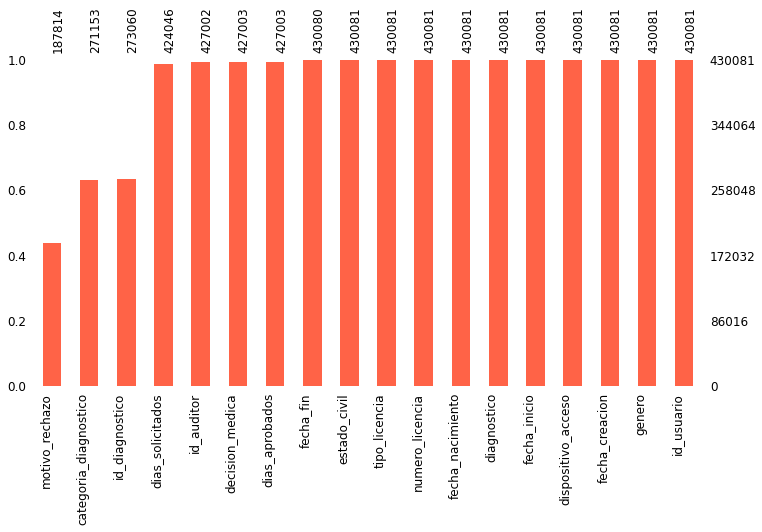

In [11]:
msno.bar(df,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato',label_rotation=90) 

<AxesSubplot:>

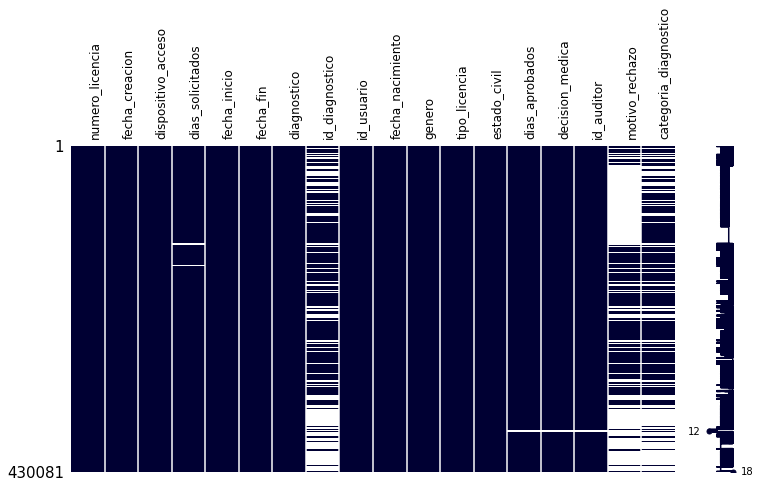

In [12]:
msno.matrix(df,figsize=(12, 6), fontsize=12, color=[0,0,0.2],label_rotation=90) 

<AxesSubplot:>

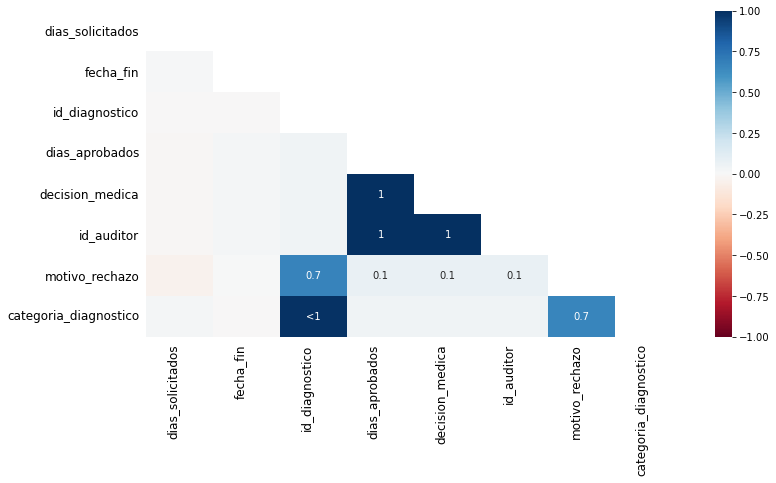

In [13]:
msno.heatmap(df,figsize=(12, 6), fontsize=12,label_rotation=90)

In [14]:
round(df.isna().sum()/df.shape[0],2)*100

numero_licencia           0.0
fecha_creacion            0.0
dispositivo_acceso        0.0
dias_solicitados          1.0
fecha_inicio              0.0
fecha_fin                 0.0
diagnostico               0.0
id_diagnostico           37.0
id_usuario                0.0
fecha_nacimiento          0.0
genero                    0.0
tipo_licencia             0.0
estado_civil              0.0
dias_aprobados            1.0
decision_medica           1.0
id_auditor                1.0
motivo_rechazo           56.0
categoria_diagnostico    37.0
dtype: float64

#### Técnicas de imputación: Eliminar

Eliminar filas completas con nulos en alguna columna en particular.

In [15]:
df['decision_medica'].isna().sum()

3078

In [16]:
df.dropna(subset=['decision_medica'],how='any',inplace=True)
df['decision_medica'].isna().sum()

0

In [17]:
df.shape

(427003, 18)

In [18]:
df.isna().sum()

numero_licencia               0
fecha_creacion                0
dispositivo_acceso            0
dias_solicitados           6034
fecha_inicio                  0
fecha_fin                     0
diagnostico                   0
id_diagnostico           155134
id_usuario                    0
fecha_nacimiento              0
genero                        0
tipo_licencia                 0
estado_civil                  0
dias_aprobados                0
decision_medica               0
id_auditor                    1
motivo_rechazo           239189
categoria_diagnostico    157025
dtype: int64

In [19]:
430081 - 427003

3078

Eliminar columnas completas que no me aportan valor y tienen alto porcentaje de datos nulos 

In [20]:
df.drop(columns=['motivo_rechazo'],inplace=True) 

#### Técnicas de imputación: Imputar

- De forma manual

In [21]:
df['dias_solicitados'].describe()

count    420969.000000
mean          5.359012
std           8.387828
min           0.000000
25%           2.000000
50%           3.000000
75%           7.000000
max         365.000000
Name: dias_solicitados, dtype: float64

In [22]:
df_mean = df.copy()
df_const = df.copy()
df_aprob = df.copy()

In [23]:
df.shape

(427003, 17)

In [24]:
df_const.loc[df_const['dias_solicitados'].isna(),'dias_solicitados'] = df_const['dias_solicitados'].fillna(0)

In [25]:
df_const['dias_solicitados'].describe()

count    427003.000000
mean          5.283284
std           8.352338
min           0.000000
25%           2.000000
50%           2.000000
75%           7.000000
max         365.000000
Name: dias_solicitados, dtype: float64

In [26]:
mean = df['dias_solicitados'].mean()

In [27]:
df_mean.loc[df_mean['dias_solicitados'].isna(),'dias_solicitados'] = df_mean['dias_solicitados'].fillna(mean)
df_mean['dias_solicitados'].describe()

count    427003.000000
mean          5.359012
std           8.328353
min           0.000000
25%           2.000000
50%           3.000000
75%           7.000000
max         365.000000
Name: dias_solicitados, dtype: float64

In [28]:
df_aprob.loc[df_aprob['dias_solicitados'].isna(),'dias_solicitados'] = df_aprob.loc[df_aprob['dias_solicitados'].isna()]['dias_aprobados']

In [29]:
df_aprob['dias_solicitados'].describe()

count    427003.000000
mean          5.414037
std           8.400207
min           0.000000
25%           2.000000
50%           3.000000
75%           7.000000
max         365.000000
Name: dias_solicitados, dtype: float64

- Con Simple Imputer

In [30]:
const_imputer = SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=0) 

df_const = df.copy()

df_const.loc[:,'dias_solicitados'] = const_imputer.fit_transform(df_const[['dias_solicitados']])
df_const['dias_solicitados'].describe()

count    427003.000000
mean          5.283284
std           8.352338
min           0.000000
25%           2.000000
50%           2.000000
75%           7.000000
max         365.000000
Name: dias_solicitados, dtype: float64

In [31]:
mean_imputer = SimpleImputer(missing_values=np.nan,strategy='mean') 

df_mean = df.copy()

df_mean.loc[:,'dias_solicitados'] = mean_imputer.fit_transform(df_mean[['dias_solicitados']])
df_mean['dias_solicitados'].describe()

count    427003.000000
mean          5.359012
std           8.328353
min           0.000000
25%           2.000000
50%           3.000000
75%           7.000000
max         365.000000
Name: dias_solicitados, dtype: float64

In [32]:
#mean_imputer = SimpleImputer(missing_values=np.nan,strategy='mean') 
#
#df_prueba = df.copy()
#
#df_prueba.loc[:,:] = mean_imputer.fit_transform(df_prueba)
#df_prueba['dias_solicitados'].describe()

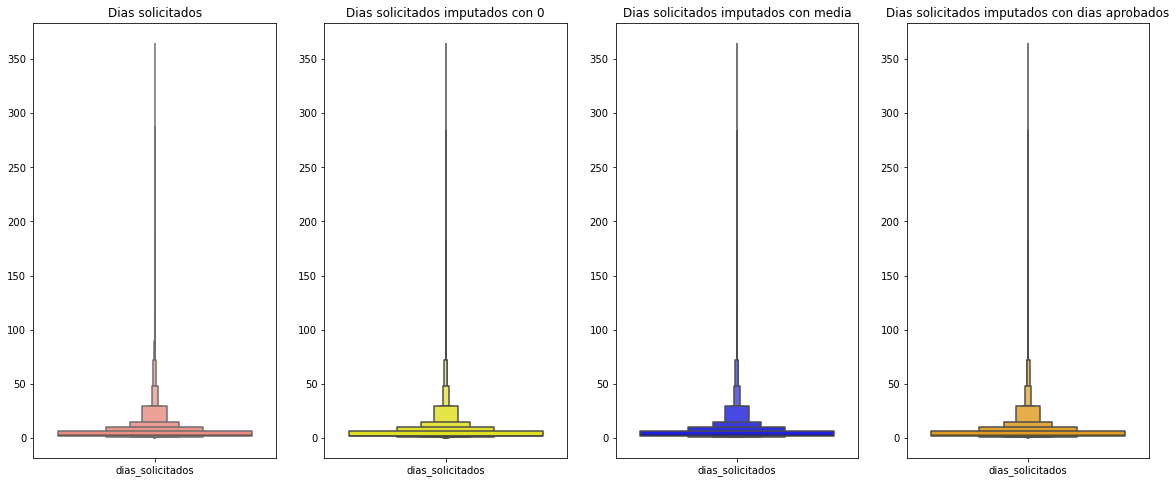

In [33]:
fig, axes = plt.subplots(1,4,figsize=(20,8))

sns.boxenplot(data=df[~df['dias_solicitados'].isna()][['dias_solicitados']],color='salmon',ax=axes[0]).ticklabel_format(style='plain', axis='y')    
axes[0].ticklabel_format(style='plain', axis='y')#para sacar la notacion cientifica, sino comentar
axes[0].set_title("Dias solicitados")

sns.boxenplot(data=df_const[['dias_solicitados']],color='yellow',ax=axes[1]).ticklabel_format(style='plain', axis='y')    
axes[1].ticklabel_format(style='plain', axis='y')#para sacar la notacion cientifica, sino comentar
axes[1].set_title("Dias solicitados imputados con 0") 

sns.boxenplot(data=df_mean[['dias_solicitados']],color='blue',ax=axes[2]).ticklabel_format(style='plain', axis='y')    
axes[2].ticklabel_format(style='plain', axis='y')#para sacar la notacion cientifica, sino comentar
axes[2].set_title("Dias solicitados imputados con media")

sns.boxenplot(data=df_aprob[['dias_solicitados']],color='orange',ax=axes[3]).ticklabel_format(style='plain', axis='y')    
axes[3].ticklabel_format(style='plain', axis='y')#para sacar la notacion cientifica, sino comentar
axes[3].set_title("Dias solicitados imputados con dias aprobados")

plt.show()

In [34]:
mean_imputer = SimpleImputer(missing_values=np.nan,strategy='mean') 

df.loc[:,'dias_solicitados'] = mean_imputer.fit_transform(df[['dias_solicitados']])
df['dias_solicitados'].describe()

count    427003.000000
mean          5.359012
std           8.328353
min           0.000000
25%           2.000000
50%           3.000000
75%           7.000000
max         365.000000
Name: dias_solicitados, dtype: float64

### Asegurar tipo de variable

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427003 entries, 0 to 430080
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   numero_licencia        427003 non-null  int64  
 1   fecha_creacion         427003 non-null  object 
 2   dispositivo_acceso     427003 non-null  object 
 3   dias_solicitados       427003 non-null  float64
 4   fecha_inicio           427003 non-null  object 
 5   fecha_fin              427003 non-null  object 
 6   diagnostico            427003 non-null  object 
 7   id_diagnostico         271869 non-null  float64
 8   id_usuario             427003 non-null  int64  
 9   fecha_nacimiento       427003 non-null  object 
 10  genero                 427003 non-null  object 
 11  tipo_licencia          427003 non-null  object 
 12  estado_civil           427003 non-null  object 
 13  dias_aprobados         427003 non-null  float64
 14  decision_medica        427003 non-nu

In [36]:
df['numero_licencia'] = df['numero_licencia'].astype('str')
df['fecha_creacion'] = df['fecha_creacion'].apply(pd.to_datetime)
df['fecha_inicio'] = df['fecha_inicio'].apply(pd.to_datetime)
df['fecha_fin'] = df['fecha_fin'].apply(pd.to_datetime)
df['id_diagnostico'] = df['id_diagnostico'].astype('str')
df['fecha_nacimiento'] = df['fecha_nacimiento'].apply(pd.to_datetime)
df['id_auditor'] = df['id_auditor'].astype('str')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427003 entries, 0 to 430080
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   numero_licencia        427003 non-null  object        
 1   fecha_creacion         427003 non-null  datetime64[ns]
 2   dispositivo_acceso     427003 non-null  object        
 3   dias_solicitados       427003 non-null  float64       
 4   fecha_inicio           427003 non-null  datetime64[ns]
 5   fecha_fin              427003 non-null  datetime64[ns]
 6   diagnostico            427003 non-null  object        
 7   id_diagnostico         427003 non-null  object        
 8   id_usuario             427003 non-null  int64         
 9   fecha_nacimiento       427003 non-null  datetime64[ns]
 10  genero                 427003 non-null  object        
 11  tipo_licencia          427003 non-null  object        
 12  estado_civil           427003 non-null  obje

### Datos ruidosos, outliers?

Si calculamos la edad de las personas, podemos visualizar como se distruye esa variable.

In [38]:
df['edad'] = (pd.Timestamp.now() - df['fecha_nacimiento'])/np.timedelta64(1, 'Y')
df['edad']= df.edad.apply(int)

In [39]:
df['edad'].describe()

count    427003.000000
mean         45.170982
std           9.990729
min          19.000000
25%          37.000000
50%          45.000000
75%          53.000000
max         124.000000
Name: edad, dtype: float64

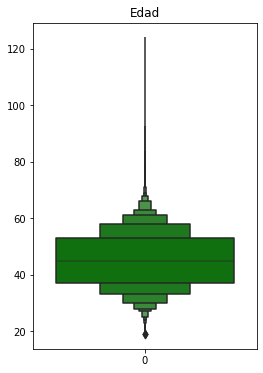

In [40]:
fig, ax = plt.subplots(figsize=(4,6))

sns.boxenplot(data=df['edad'],color='green').ticklabel_format(style='plain', axis='y')    
ax.ticklabel_format(style='plain', axis='y')#para sacar la notacion cientifica, sino comentar
ax.set_title("Edad") 

plt.show()

In [41]:
edad_maxima = df['edad'].quantile(0.995)

In [42]:
df[df['edad'] < edad_maxima].sort_values(by='edad',ascending=False)

,numero_licencia,fecha_creacion,dispositivo_acceso,dias_solicitados,fecha_inicio,fecha_fin,diagnostico,id_diagnostico,id_usuario,fecha_nacimiento,genero,tipo_licencia,estado_civil,dias_aprobados,decision_medica,id_auditor,categoria_diagnostico,edad
83235,240293,2022-03-25 08:38:21.645,APP,2.0,2022-03-25,2022-03-26,INFLUENZA DEBIDO A VIRUS DE LA INFLUENZA IDENT...,23.0,52705,1956-03-07,FEMALE,Médica,OTHER,2.0,APROBAR,0.0,RESPIRATORIO,68
294607,215866,2022-02-02 07:58:43.275,APP,7.0,2022-02-02,2022-02-08,COVID POSITIVO,38.0,58492,1956-02-27,FEMALE,Médica,OTHER,7.0,EDITAR_Y_APROBAR,5443.0,INFECCIONES,68
372515,229519,2022-03-07 19:39:58.467,APP,2.0,2022-03-07,2022-03-08,REUMATISMO NO ESPECIFICADO. FIBROMIALGIA Y FIB...,275.0,44859,1955-06-11,FEMALE,Médica,MARRIED,2.0,EDITAR_Y_APROBAR,802.0,TRAUMATOLOGIA Y ORTOPEDIA,68
127487,363910,2022-09-15 08:53:34.013,APP,15.0,2022-09-15,2022-09-27,CIRUGIA DE CATARATA,102.0,78124,1956-01-29,FEMALE,Médica,OTHER,15.0,APROBAR,0.0,CIRUGIA,68
127376,359961,2022-09-09 13:29:11.902,APP,2.0,2022-09-09,2022-09-10,LUMBAGO NO ESPECIFICADO. CONTRACTURA DORSAL IN...,22.0,58703,1956-04-08,MALE,Médica,MARRIED,2.0,APROBAR,0.0,TRAUMATOLOGIA Y ORTOPEDIA,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127719,402959,2022-11-11 12:39:44.366,APP,1.0,2022-11-11,2022-11-11,INFLUENZA DEBIDO A VIRUS DE LA INFLUENZA IDENT...,23.0,78717,2003-08-31,FEMALE,Médica,OTHER,1.0,APROBAR,0.0,RESPIRATORIO,20
126019,350075,2022-08-26 13:22:16.328,APP,1.0,2022-08-26,2022-08-26,CERVICALGIA,71.0,75833,2003-06-11,FEMALE,Médica,OTHER,1.0,APROBAR,0.0,TRAUMATOLOGIA Y ORTOPEDIA,20
319582,317778,2022-07-04 23:13:09.099,APP,2.0,2022-07-04,2022-07-05,COVID SOSPECHOSO,32.0,73152,2003-07-22,FEMALE,Médica,OTHER,2.0,EDITAR_Y_APROBAR,177.0,INFECCIONES,20
137383,380395,2022-10-11 08:55:33.256,WEB,21.0,2022-10-11,2022-10-13,"LUXACION,ESGUINCE Y TORCEDURA DE ARTICULACIONE...",4.0,78722,2004-07-01,FEMALE,Médica,OTHER,4.0,EDITAR_Y_APROBAR,878.0,TRAUMATISMOS,19


In [43]:
df[['dias_solicitados','dias_aprobados']].describe()

,dias_solicitados,dias_aprobados
count,427003.000000,427003.000000
mean,5.359012,3.879624
std,8.328353,4.416187
min,0.000000,0.000000
25%,2.000000,1.000000
50%,3.000000,2.000000
75%,7.000000,5.000000
max,365.000000,60.000000


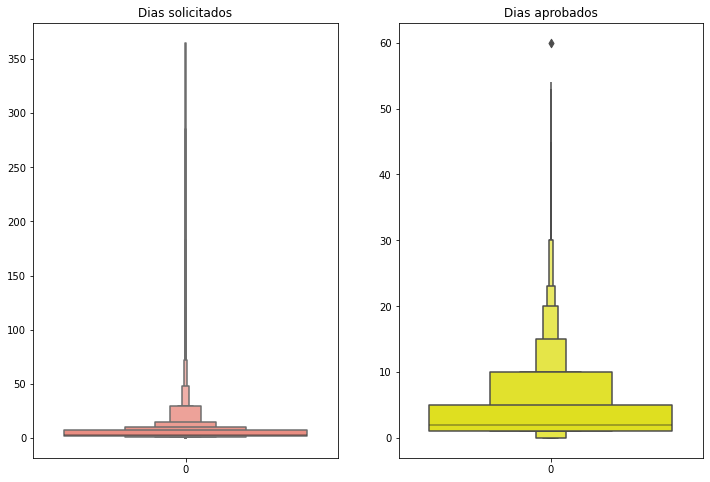

In [44]:
fig, axes = plt.subplots(1,2,figsize=(12,8))

sns.boxenplot(data=df['dias_solicitados'],color='salmon',ax=axes[0]).ticklabel_format(style='plain', axis='y')    
axes[0].ticklabel_format(style='plain', axis='y')#para sacar la notacion cientifica, sino comentar
axes[0].set_title("Dias solicitados")

sns.boxenplot(data=df['dias_aprobados'],color='yellow',ax=axes[1]).ticklabel_format(style='plain', axis='y')    
axes[1].ticklabel_format(style='plain', axis='y')#para sacar la notacion cientifica, sino comentar
axes[1].set_title("Dias aprobados") 

plt.show()

In [45]:
df.dias_solicitados.quantile(0.98)

30.0

In [46]:
df.dias_aprobados.quantile(0.98)

17.0

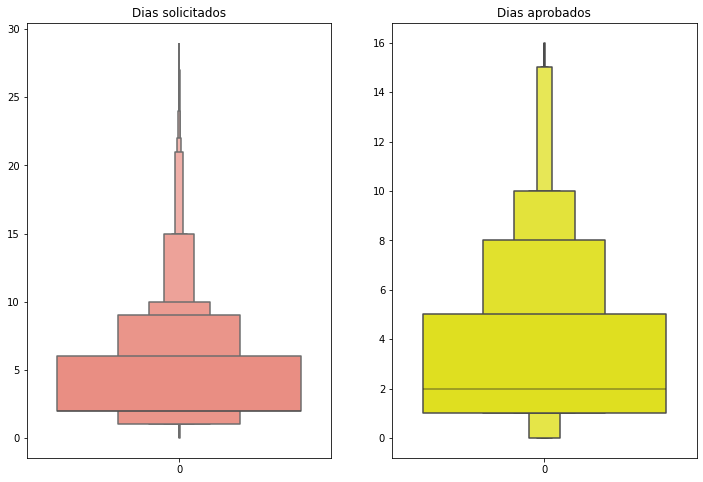

In [47]:
fig, axes = plt.subplots(1,2,figsize=(12,8))

sns.boxenplot(data=df[df['dias_solicitados'] < df.dias_solicitados.quantile(0.98)]['dias_solicitados']
              ,color='salmon',ax=axes[0]).ticklabel_format(style='plain', axis='y')    
axes[0].ticklabel_format(style='plain', axis='y')#para sacar la notacion cientifica, sino comentar
axes[0].set_title("Dias solicitados")

sns.boxenplot(data=df[df['dias_aprobados'] < df.dias_aprobados.quantile(0.98)]['dias_aprobados']
              ,color='yellow',ax=axes[1]).ticklabel_format(style='plain', axis='y')    
axes[1].ticklabel_format(style='plain', axis='y')#para sacar la notacion cientifica, sino comentar
axes[1].set_title("Dias aprobados") 

plt.show()

In [48]:
numbers = list(range(1,12,1))
numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [49]:
np.quantile(numbers,0.25)

3.5

In [50]:
np.quantile(numbers,0.50)

6.0

In [51]:
np.quantile(numbers,0.75)

8.5